In [1]:
#import needed libraries
import math as m 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

### Q1)

Write a MATLAB function file for f(θ).Theparameters L1,L2,L3,γ,x1,x2,y2 are fixed constants, and the strut lengths p1, p2, p3 will be known for a given pose. Check Appendix B.5 if you are new to MATLAB function files. Here, for free, are the first and last lines:

                        function out=f(theta)
                              :
                              :
                    out=N1^2+N2^2-p1^2*D^2; √
                    
To test your code ,set the parameters L1=2 , L2=L3= 2, γ=π/2 , p1=p2=
p3 = √5 from Figure 1.15. Then, substituting θ = −π/4 or θ = π/4, corresponding to
Figures 1.15(a, b), respectively, should make f (θ ) = 0.

In [42]:
def fun(L1, L2, L3, gamma, x1, x2, y2,theta):
    '''Function to return the values of x , y and the f '''
    
    A2=L3*m.cos(theta)-x1
    
    B2 = L3*m.sin(theta)
    
    A3=L2*m.cos(theta+gamma)-x2
    
    B3=L2*m.sin(theta+gamma)-y2
    
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    
    D = 2*(A2*B3-B2*A3)
    
    x = round(float(N1/D), 4)
    y = round(float(N2/D), 4)    
    f = round(float((N1**2+N2**2-p1**2*(D**2))), 4)

    return x,y,f


In [43]:
#Defining the variables that are going to be used 
x1 = 4
x2 = 0
y2 = 4
L1 = 2
L2 = L3 = m.sqrt(2)
p1 = p2 = p3 = m.sqrt(5)
gamma = (m.pi/2)
theta = (-m.pi/4)

In [46]:
print("x     y        f")
#Calling the defined function with theta
print(fun(L1, L2, L3, gamma, x1, x2, y2,theta))

x     y        f
(1.0, 2.0, -0.0)


### Q2)

Plot f(θ)on[−π,π].You may use the @ symbol as described in Appendix B.5 to assign a function handle to your function file in the plotting command. You may also need to precede arithmetic operations with the “.” character to vectorize the operations, as explained in Appendix B.2. As a check of your work, there should be roots at ± π/4.

In [47]:
#Defining an array from [-pi,pi]
ar = np.linspace(-1*np.pi,np.pi)

In [48]:
#Calling the defined funtion to check the value
fun(L1, L2, L3, gamma, x1, x2, y2,-3.141592653589793)

(2.7071, 2.7071, 33192.2886)

In [49]:
#Redefining the values as per the above question 
x1 = 4
x2 = 0
y2 = 4
L1 = 2
L2 = L3 = m.sqrt(2)
p1 = p2 = p3 = m.sqrt(5)
gamma = (m.pi/2)

#Defining empty arrays to store values of x and y 
x_val=[]
y_val=[]

#Iterating through the defined array to get the values of x and y in the list
for i in range(len(ar)):
    theta=ar[i]
    x_val.append(ar[i])
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2,theta)
    y_val.append(f)

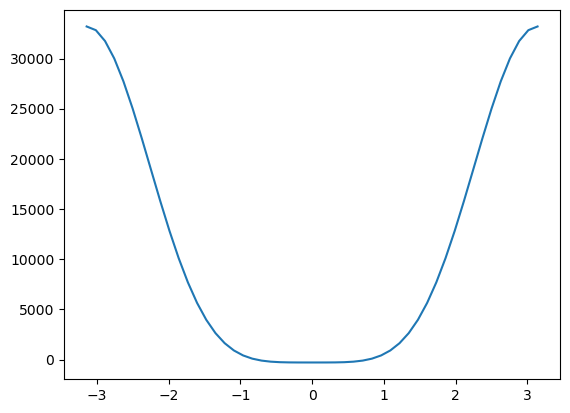

In [8]:
#Plotting the x and y list recieved from the above code 
plt.plot(x_val,y_val)

 The graph  shows that roots can be found at -pi/4 and  +pi/4

### Q3)

ReproduceFigure1.15.The MATLAB commands

                        >> plot([u1 u2 u3 u1],[v1 v2 v3 v1],’r’); hold on
                        
                        >> plot([0 x1 x2],[0 0 y2],’bo’)
                        
will plot a red triangle with vertices (u1,v1),(u2,v2),(u3,v3) and place small circles at the strut anchor points (0,0),(x1,0),(x2,y2). In addition, draw the struts.

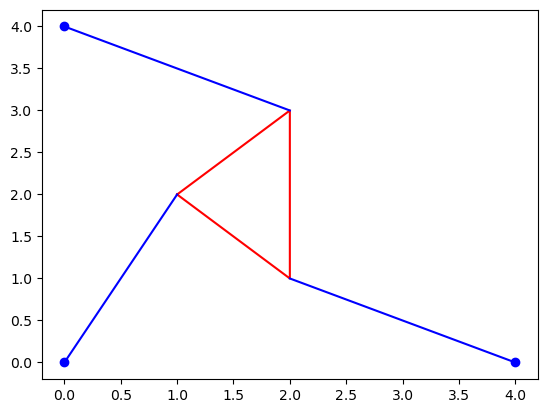

In [9]:
import matplotlib.pyplot as plt

#Setting the beginning positions
x0 = 0
y0 = 0

x1 = 4
y1 = 0

x2 = 0
y2 = 4

#Defining the Stewart platform vertex points
x = 1
y = 2

u1 = x
v1 = y

u2 = 2
v2 = 3

u3 = 2
v3 = 1

#plotting the triangle (planar Stewart platform) 
plt.plot([u1, u2, u3, u1], [v1, v2, v3, v1], 'r')

#plotting the strut beginning points
plt.plot([x0, x1, x2], [y0, y1, y2], 'bo')

#plotting the strut lines
plt.plot([x0, u1], [y0, v1], 'b')
plt.plot([x1, u3], [y1, v3], 'b')
plt.plot([x2, u2], [y2, v2], 'b')

plt.show()


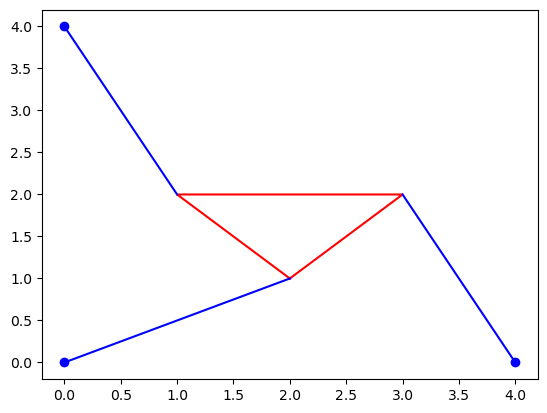

In [10]:
import matplotlib.pyplot as plt

#Defining the strut's beginning positions
x0 = 0
y0 = 0

x1 = 4
y1 = 0

x2 = 0
y2 = 4

#Setting the Stewart platform vertex points
x = 2
y = 1

u1 = x
v1 = y

u2 = 1
v2 = 2

u3 = 3
v3 = 2

#plotting the triangle (planar Stewart platform)
plt.plot([u1, u2, u3, u1], [v1, v2, v3, v1], 'r')

#plotting the strut beginning points
plt.plot([x0, x1, x2], [y0, y1, y2], 'bo')

#plotting the strut lines
plt.plot([x0, u1], [y0, v1], 'b')
plt.plot([x1, u3], [y1, v3], 'b')
plt.plot([x2, u2], [y2, v2], 'b')

plt.show()


### Q4)

Solve the forward kinematics problem for the planar Stewart platform specified by
x1 =5,(x2,y2)=(0,6),L1 = L3 =3,L2 =3√2,γ =π/4,p1 = p2 =5,p3 =3.Begin by plotting f (θ ). Use an equation solver to find all four poses, and plot them. Check your answers by verifying that p1, p2, p3 are the lengths of the struts in your plot.


Figure 1.15 Two poses of the planar Stewart platform with identical arm lengths. Each pose corresponds to a solution of (1.38) with strut lengths
p1 =p2 =p3 =√,5. The shape of the triangle is defined by L1 =2, L2 =L3 =√,2, γ =π/2.

In [11]:
#Redefining the values as per the above question 
L1=L3=3
L2=3*m.sqrt(2)
p1=p2=5
p3=3
x1=5
x2=0
y2=6
gamma=m.pi/4

#Defiing empty arrays to store values of x and y 
x_val1=[]
y_val1=[]

#Iterating through the defined array to get the values of x and y in the list
for i in range(len(ar)):
    theta=ar[i]
    x_val1.append(ar[i])
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2,theta)
    y_val1.append(f)

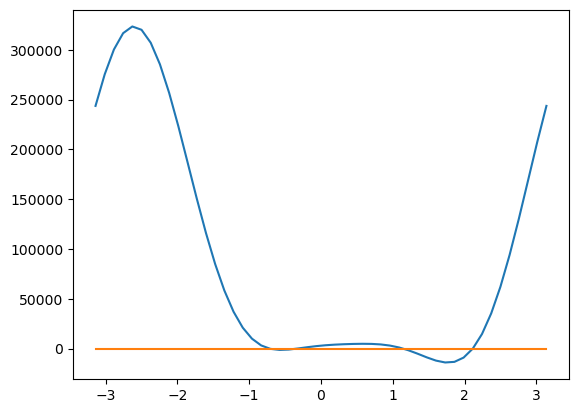

In [12]:
#Plotting the x and y list recieved from the above code along with a yellow line at y=0
plt.plot(x_val1,y_val1)
plt.plot([-np.pi, np.pi], [0, 0])

In [13]:
#Redefining the variables as per the above question
L1=L3=3
L2=3*m.sqrt(2)
p1=p2=5
p3=3
x1=5
x2=0
y2=6
gamma=m.pi/4

USING FPI TO FIND ROOTS 

We are using FPI method to find the roots for the different function that will be used throughout this project

In [14]:
#Defining an empty list to store all the x values at each theta 
x_root_val=[]
def fpi(theta) :
    '''This function evaluates the user defined function fun at any values of theta '''
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta)
    x_root_val.append(x)
    return f
    

In [15]:
#Denining the function w.r.t theta 
f = lambda theta: fun(L1, L2, L3, gamma, x1, x2, y2, theta)[2]

In [16]:
def find_roots():
    '''This function finds all the values of f where theta ranges from [-pi,pi]  '''
    #Defining and empty list to store all the f/y values 
    roots = []
    ar=np.linspace(-1*np.pi,np.pi,10000)
    for i in range(len(ar)):
        theta_guess =float(ar[i])
        r=fpi(theta_guess)
        roots.append(r)
    return roots

In [17]:
#Calling the definged function 
roots=find_roots()

In [18]:
def find_value_change(arr):
    '''This function checks if the signs of the root values are changing ,
    If the values are changing it means that there exists a root between them and stores these values in real_roots '''
    real_roots=[]
    for i in range(len(arr)-1):
        if (roots[i] >= 0 and roots[i+1] < 0)or(roots[i] < 0 and roots[i+1] >= 0):
            real_roots.append(i)
    return real_roots

In [19]:
#Calling the above defined function
theta_index = find_value_change(roots)

In [20]:
#Printing the corresponding values of theta where the function tends to 0.
arr=np.linspace(-1*np.pi,np.pi,10000)
theta1=arr[theta_index[0]]
theta2=arr[theta_index[1]]
theta3=arr[theta_index[2]]
theta4=arr[theta_index[3]]
print('Theta 1 =  ',theta1)
print('Theta 2 =  ',theta2)
print('Theta 3 =  ',theta3)
print('Theta 4 =  ',theta4)

Theta 1 =   -0.7210676207609334
Theta 2 =   -0.33147117207093
Theta 3 =   1.1433399006313891
Theta 4 =   2.115445878249833


Hence the four theta values where the function f(theta) becomes zero is approximately :

Theta 1 =   -0.7210676207609334

Theta 2 =   -0.33147117207093

Theta 3 =   1.1433399006313891

Theta 4 =   2.115445878249833

providing the theta values to the fun function to get the x,y coordinates for the triangle.

L1=L3=3
L2=3*m.sqrt(2)
p1=p2=5
p3=3
x1=5
x2=0
y2=6
gamma=m.pi/4

In [21]:
#Redefining the variables according to the question
L1 = 3
L2 = 3 * m.sqrt(2)
L3 = L1

#p1= needs to be checked!
#p2= needs to be checked!
#p3= needs to be checked!
x1 = 5
x2 = 0
y2 = 6
gamma = m.pi * (1 / 4)
p1=p2=5 
p3=3

In [22]:
def verify_p(theta,x,y):
    '''This function verifies the value of p with the values of p which are already provided'''
    #equation definitions from 1.38
    A2 = L3 * m.cos(theta) - x1
    B2 = L3 * m.sin(theta)
    A3 = L2 * m.cos(theta + gamma) - x2
    B3 = L2 * m.sin(theta + gamma) - y2

    #solving for p1, p2, p3 from 1.38
    p1 = round(m.sqrt(x**2 + y**2),3)
    p2 = round(m.sqrt((x + A2)**2 + (y + B2)**2),3)
    p3 = round(m.sqrt((x + A3)**2 + (y + B3)**2),3)

    #combining the values into single vector
    p_vec = [p1, p2, p3]
    
    return p_vec

In [23]:
def Stewart_plot(x, y, theta, p1, p2, p3):
    '''This function prints The Stewart Triangle if all the parameters are provided'''
    #Defining the strut beginning positions 
    #Solving for planar Stewart platform side points (via 1.38 equations)
    u1 = x
    v1 = y
    u2 = x + p2*np.cos(theta + gamma)
    v2 = y + p2*np.sin(theta + gamma)
    u3 = x + p3*np.cos(theta)
    v3 = y + p3*np.sin(theta)
    
    plt.plot([u1, u2, u3, u1], [v1, v2, v3, v1], 'r')
    plt.autoscale(True)
    
    #Plotting the strut beginning points
    plt.plot([x0, x1, x2], [y0, y1, y2], 'bo')
    
    #Plotting the strut lines
    plt.plot([x0, u1], [y0, v1], 'b')
    plt.plot([x1, u3], [y1, v3], 'b')
    plt.plot([x2, u2], [y2, v2], 'b')
    
    plt.show()

For theta 1

x :  -1.3784
y :  4.8064
p :  [5.0, 5.0, 3.0]


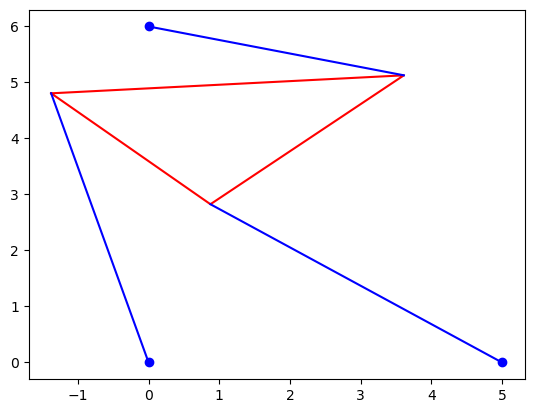

In [24]:
#Plotting for theta 1
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta1)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta1,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta1,p_vec[0],p_vec[1],p_vec[2])

For theta 2

x :  -0.916
y :  4.9147
p :  [4.999, 4.999, 2.999]


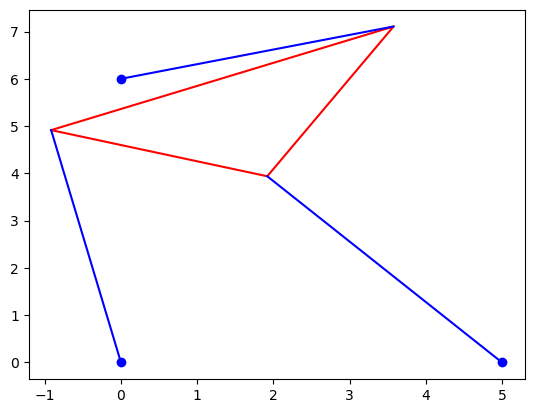

In [25]:
#Plotting for theta 2 
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta2)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta2,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta2,p_vec[0],p_vec[1],p_vec[2])

For theta 3 

x :  4.4825
y :  2.2183
p :  [5.001, 5.001, 3.002]


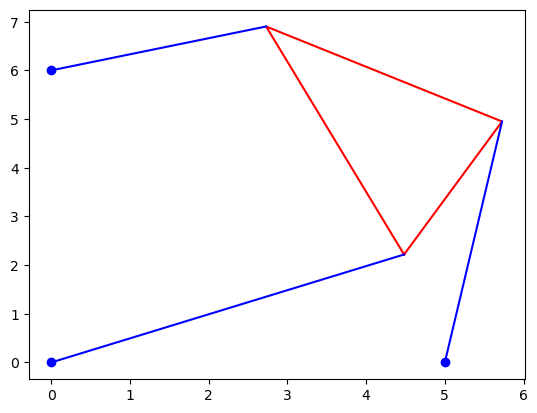

In [26]:
#Plotting for theta 3
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta3)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta3,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta3,p_vec[0],p_vec[1],p_vec[2])

x :  4.5716
y :  2.0235
p :  [4.999, 4.999, 2.999]


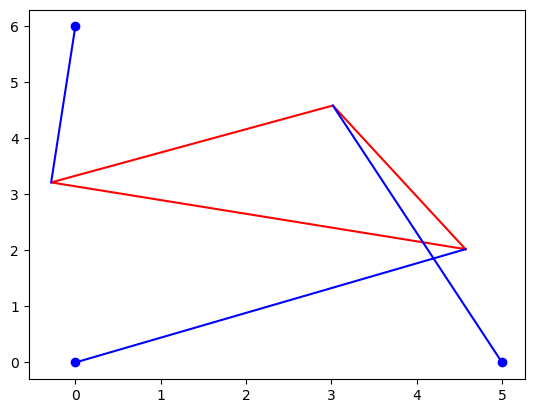

In [27]:
#Plotting for theta 4
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta4)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta4,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta4,p_vec[0],p_vec[1],p_vec[2])

### Q5)

Change strut length to p2=7 and re-solve the problem. For these parameters,there are six poses.

In [28]:
#Redefining the values as per the above question
L1 = 3
L2 = 3 * m.sqrt(2)
L3 = L1

#p1= needs to be checked!
#p2= needs to be checked!
#p3= needs to be checked!
x1 = 5
x2 = 0
y2 = 6
gamma = m.pi * (1 / 4)
p1=5
p2=7
p3=3

In [29]:
#Defining empty list to store x and y values for different values of theta 
x_val1=[]
y_val1=[]
#Iterating over [-pi,pi] to check if f=0 at any ar[i]
for i in range(len(ar)):
    theta=ar[i]
    x_val1.append(ar[i])
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2,theta)
    y_val1.append(f)

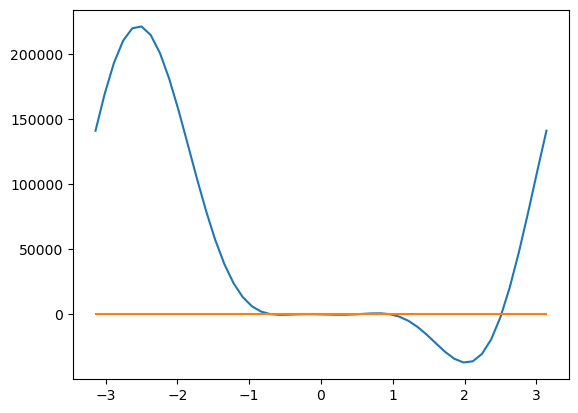

In [30]:
#Plotting the values that were recieved from the above code along with an yellow line of length 2pi at y=0
plt.plot(x_val1,y_val1)
plt.plot([-np.pi, np.pi], [0, 0])


In [31]:
#Fining the roots 
roots=find_roots()

In [32]:
#Displaying the roots
roots

[141184.0,
 141331.9424,
 141479.8169,
 141627.6232,
 141775.3611,
 141923.0303,
 142070.6306,
 142218.1618,
 142365.6235,
 142513.0155,
 142660.3376,
 142807.5896,
 142954.7711,
 143101.8819,
 143248.9218,
 143395.8906,
 143542.7879,
 143689.6135,
 143836.3672,
 143983.0487,
 144129.6578,
 144276.1942,
 144422.6577,
 144569.048,
 144715.3649,
 144861.6081,
 145007.7774,
 145153.8725,
 145299.8932,
 145445.8393,
 145591.7104,
 145737.5063,
 145883.2268,
 146028.8716,
 146174.4406,
 146319.9333,
 146465.3497,
 146610.6894,
 146755.9521,
 146901.1378,
 147046.246,
 147191.2765,
 147336.2292,
 147481.1037,
 147625.8999,
 147770.6173,
 147915.2559,
 148059.8154,
 148204.2955,
 148348.6959,
 148493.0165,
 148637.257,
 148781.417,
 148925.4965,
 149069.4951,
 149213.4126,
 149357.2487,
 149501.0033,
 149644.676,
 149788.2666,
 149931.7748,
 150075.2005,
 150218.5434,
 150361.8032,
 150504.9796,
 150648.0726,
 150791.0816,
 150934.0067,
 151076.8474,
 151219.6037,
 151362.2751,
 151504.8615,


In [33]:
#Checking the number of roots 
theta_index = find_value_change(roots)

In [74]:
theta_index
print('There are',len(theta_index),'roots')

There are 2 roots


In [35]:
#Printing all the theta values 
arr=np.linspace(-1*np.pi,np.pi,10000)
theta1=arr[theta_index[0]]
theta2=arr[theta_index[1]]
theta3=arr[theta_index[2]]
theta4=arr[theta_index[3]]
theta5=arr[theta_index[4]]
theta6=arr[theta_index[5]]
print('Theta 1 =  ',theta1)
print('Theta 2 =  ',theta2)
print('Theta 3 =  ',theta3)
print('Theta 4 =  ',theta4)
print('Theta 5 =  ',theta5)
print('Theta 6 =  ',theta6)

Theta 1 =   -0.6733106367279653
Theta 2 =   -0.3553496640874143
Theta 3 =   0.0373886914468633
Theta 4 =   0.45840420857960895
Theta 5 =   0.97744721925371
Theta 6 =   2.513839666103804


x :  -4.3145
y :  2.527
p :  [5.0, 7.0, 3.0]


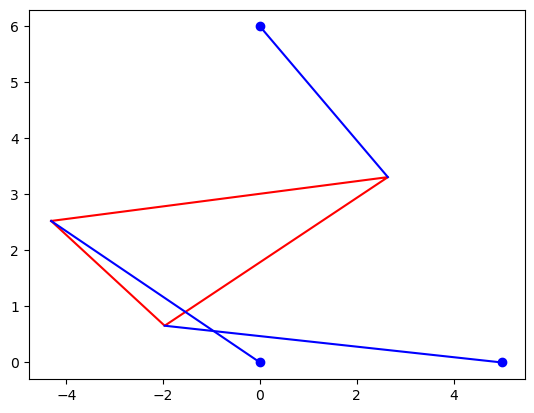

In [36]:
#Plotting for theta 1
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta1)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta1,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta1,p_vec[0],p_vec[1],p_vec[2])

x :  -4.8041
y :  1.3852
p :  [5.0, 7.0, 3.0]


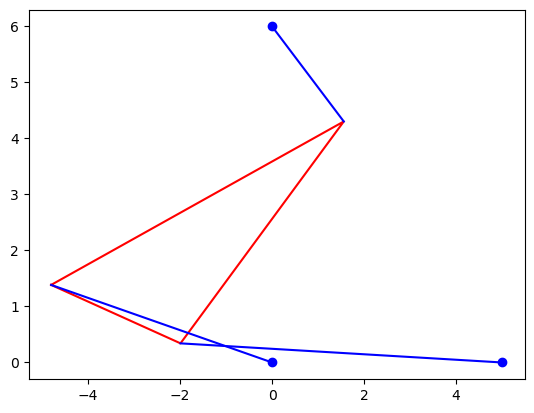

In [37]:
#Plotting for theta 2
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta2)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta2,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta2,p_vec[0],p_vec[1],p_vec[2])

x :  -4.9497
y :  0.7115
p :  [5.001, 7.0, 3.001]


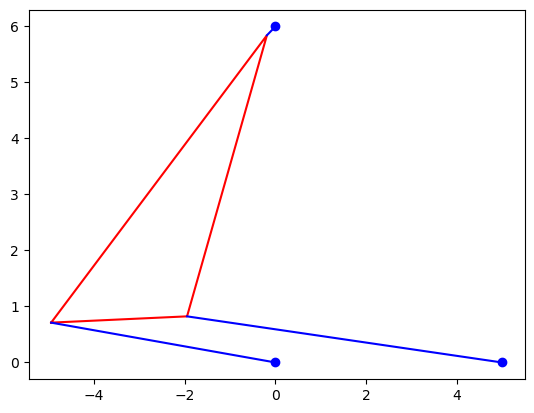

In [38]:
#Plotting for theta 3
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta3)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta3,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta3,p_vec[0],p_vec[1],p_vec[2])

x :  -0.8273
y :  4.9267
p :  [4.996, 6.997, 2.993]


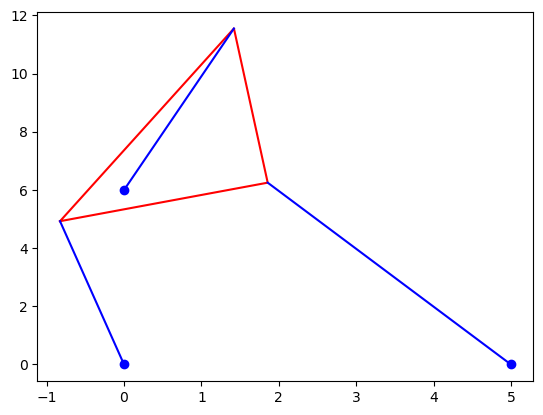

In [39]:
#Plotting for theta 4
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta4)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta4,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta4,p_vec[0],p_vec[1],p_vec[2])

x :  2.3034
y :  4.4388
p :  [5.001, 7.001, 3.001]


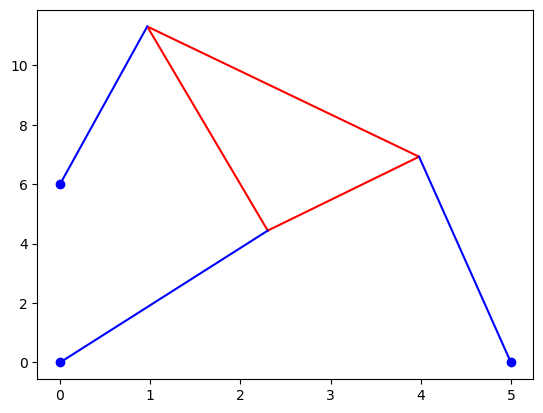

In [40]:
#Plotting for theta 5
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta5)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta5,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta5,p_vec[0],p_vec[1],p_vec[2])

x :  3.2157
y :  3.8287
p :  [5.0, 7.0, 3.0]


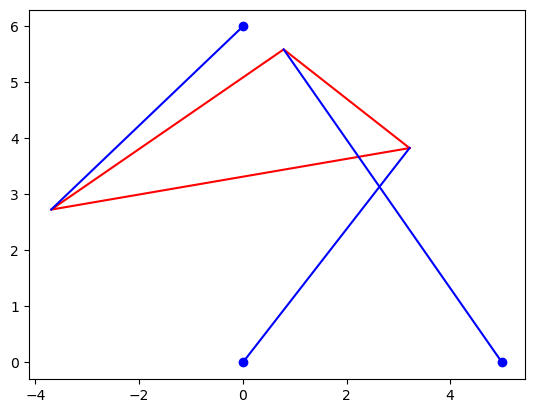

In [41]:
#Plotting for theta 6
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta6)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta6,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta6,p_vec[0],p_vec[1],p_vec[2])

### Q6)

Find a strut length p2 , with the rest of the parameters as in Step4 , for which there are only two poses.

In [42]:
#Redefining the variables for the above question
x1=5
x2=0
y2=6
L1=L3=3
L2=3*m.sqrt(2)
gamma=m.pi*(1/4)
p1=5
p3=3
ar=np.linspace(-1*np.pi,np.pi,10000)

In [43]:
#Creating an array 
p_x=np.arange(0,10)

In [44]:
#Displaying the array
p_x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

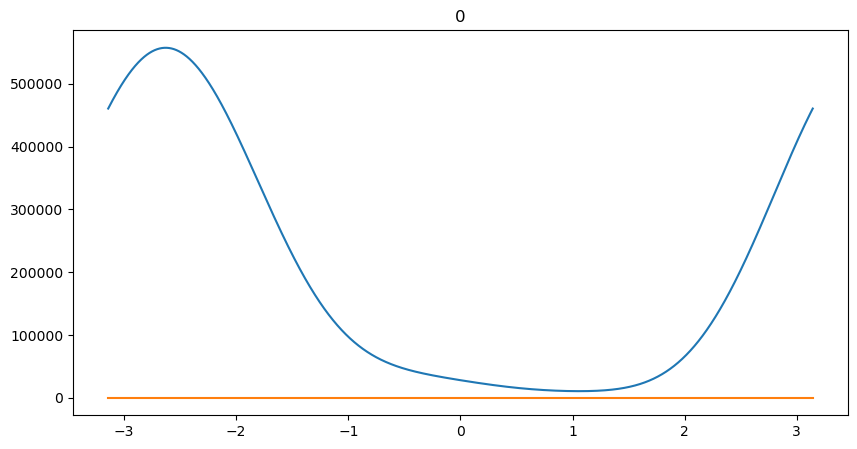

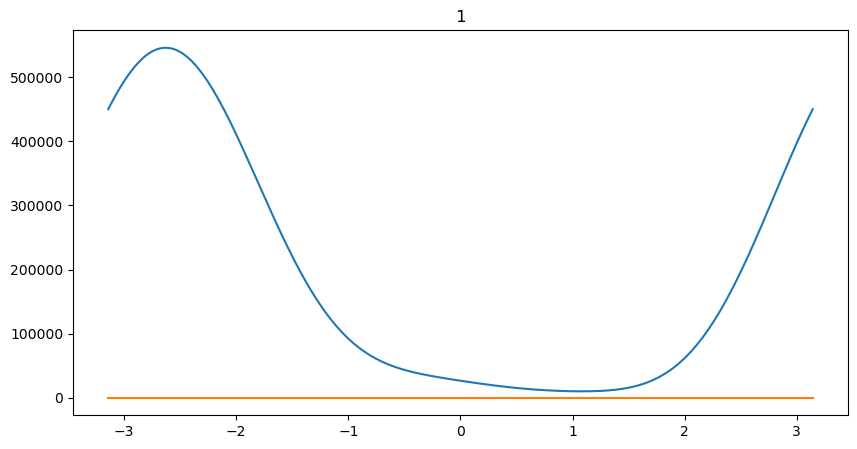

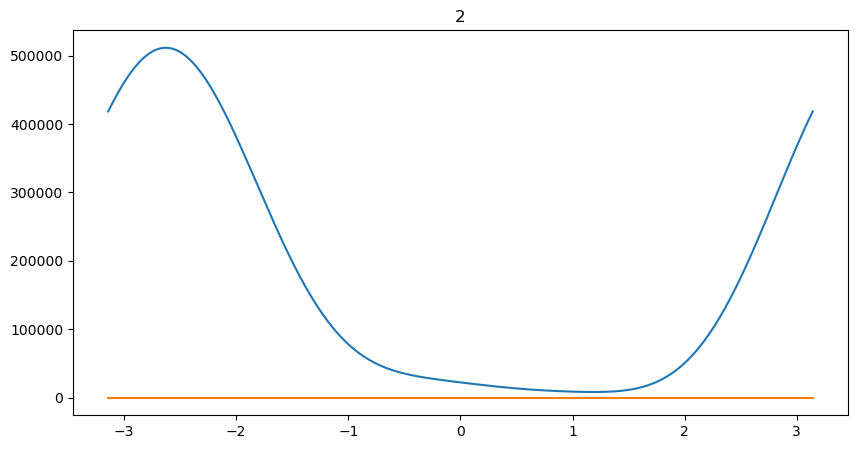

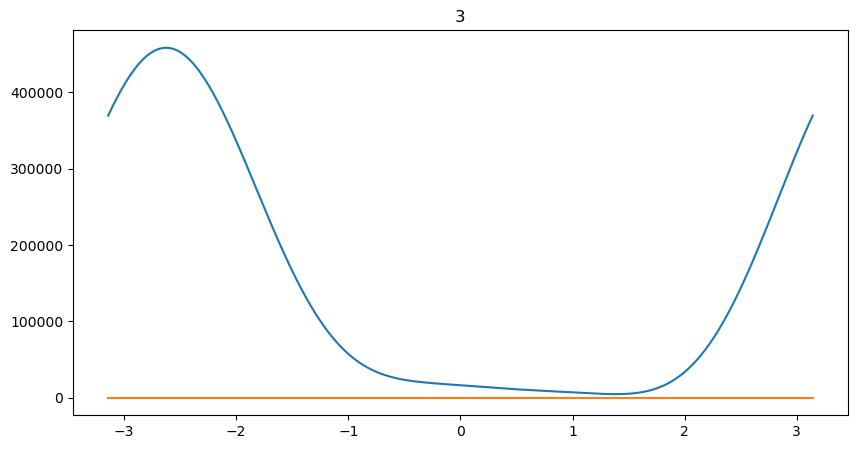

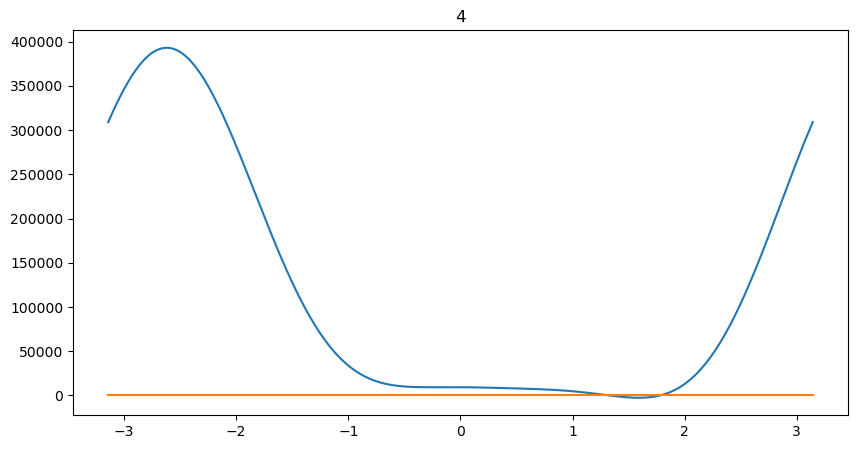

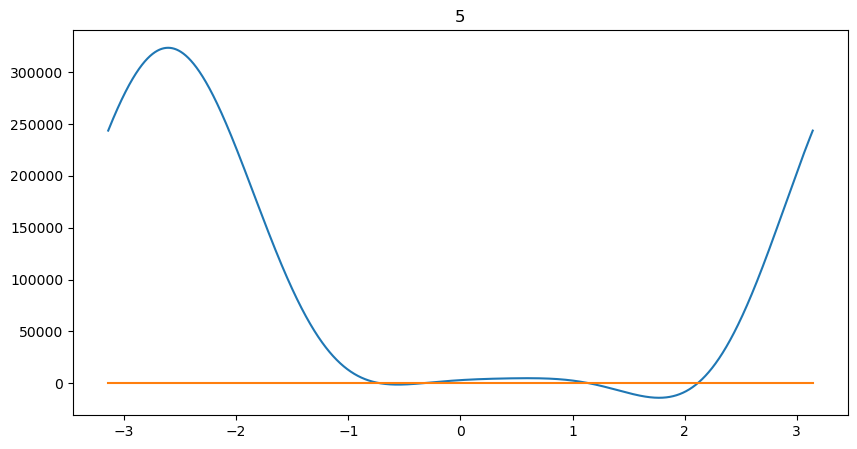

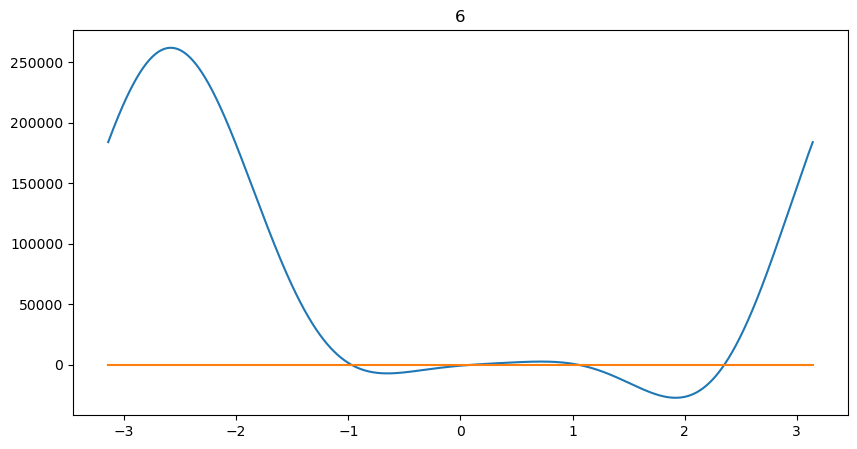

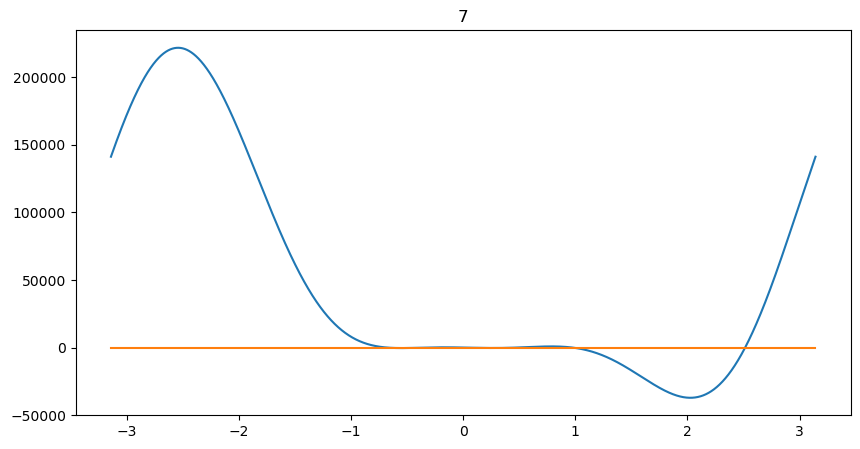

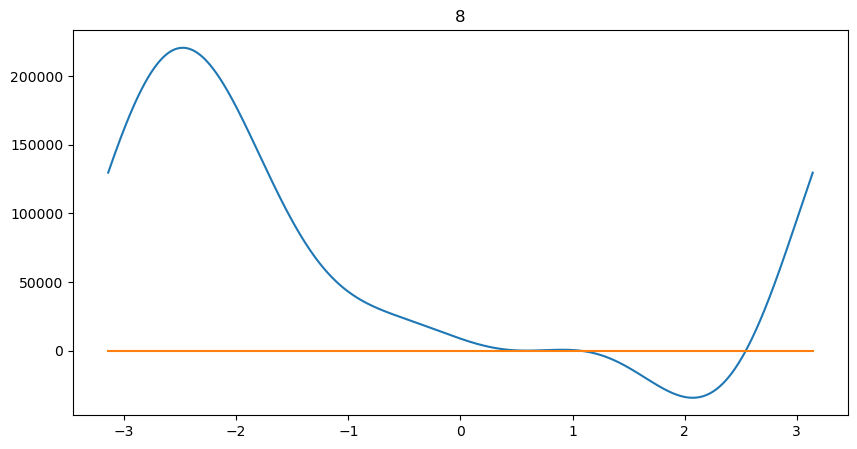

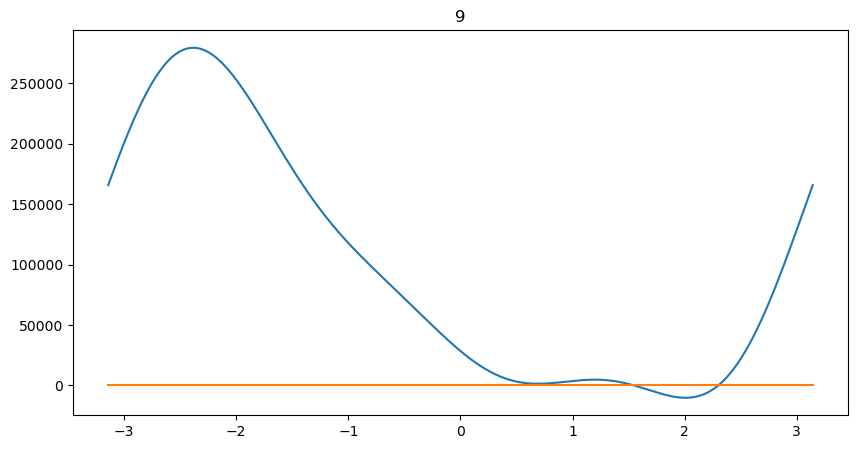

In [45]:
#Loop to plot the function of theta at different values of p
#Iterating through the list for each value in p_x
for j in range(len(p_x)):
    p2=j
    x_val1=[]
    y_val1=[]
    
    #Iterating through [-pi,pi] to get all the values of x y and f
    for i in range(len(ar)):
        theta=ar[i]
        x_val1.append(ar[i])
        x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2,theta)
        y_val1.append(f)
    
    #Plotting the graph for different values of x and y 
    plt.figure(figsize=(10,5))
    plt.plot(x_val1,y_val1)
    plt.plot([-np.pi, np.pi], [0, 0])
    plt.title(p_x[j])

Since from the above graph it is evident that the value of p2 = 4  while theta is in range from [-pi,pi] we get absolutely 2 roots .

This means that we will have 2 values of theta, resulting in two poses. 

In [46]:
#Instantiating the value of p2 = 4 
x1=5
x2=0
y2=6
L1=L3=3
L2=3*m.sqrt(2)
gamma=m.pi*(1/4)
p1=5
p3=3
ar=np.linspace(-1*np.pi,np.pi,10000)
p2=4

In [47]:
#Verifying the guess
x_val1=[]
y_val1=[]
for i in range(len(ar)):
    theta=ar[i]
    x_val1.append(ar[i])
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2,theta)
    y_val1.append(f)

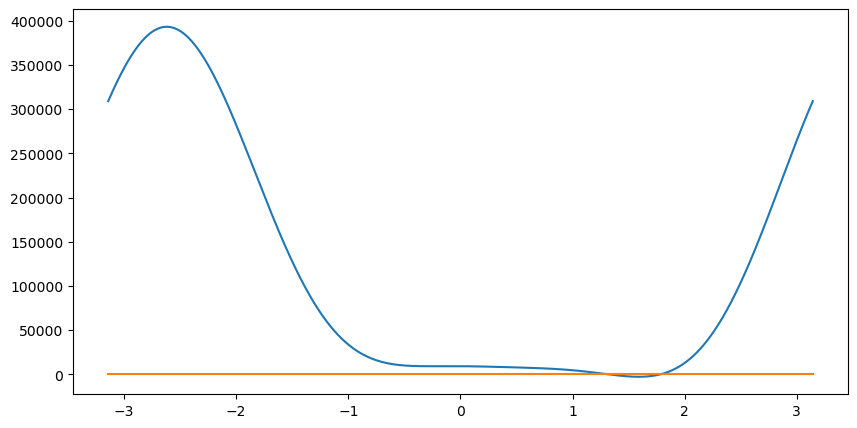

In [48]:
#Plotting the graph where the value od p =4
plt.figure(figsize=(10,5))
plt.plot(x_val1,y_val1)
plt.plot([-np.pi, np.pi], [0, 0])


In [49]:
#Finding the roots as per the above defined points
roots=find_roots()
roots

[308890.0,
 309073.245,
 309256.357,
 309439.3357,
 309622.1809,
 309804.8922,
 309987.4693,
 310169.9121,
 310352.2201,
 310534.3931,
 310716.4308,
 310898.333,
 311080.0992,
 311261.7294,
 311443.2231,
 311624.5801,
 311805.8001,
 311986.8829,
 312167.828,
 312348.6354,
 312529.3046,
 312709.8353,
 312890.2274,
 313070.4805,
 313250.5943,
 313430.5686,
 313610.403,
 313790.0974,
 313969.6513,
 314149.0646,
 314328.3368,
 314507.4679,
 314686.4574,
 314865.3051,
 315044.0108,
 315222.574,
 315400.9946,
 315579.2723,
 315757.4068,
 315935.3977,
 316113.2449,
 316290.9481,
 316468.5069,
 316645.9211,
 316823.1904,
 317000.3145,
 317177.2932,
 317354.1261,
 317530.813,
 317707.3537,
 317883.7477,
 318059.995,
 318236.0951,
 318412.0478,
 318587.8528,
 318763.5098,
 318939.0187,
 319114.379,
 319289.5905,
 319464.6529,
 319639.566,
 319814.3295,
 319988.9431,
 320163.4065,
 320337.7195,
 320511.8817,
 320685.893,
 320859.7529,
 321033.4613,
 321207.0179,
 321380.4224,
 321553.6745,
 32172

In [50]:
#Checking the theta index to get index values 
theta_index = find_value_change(roots)
theta_index

[7118, 7828]

In [51]:
#Printing the Thetas
theta1=arr[theta_index[0]]
theta2=arr[theta_index[1]]
print('Theta 1 =  ',theta1)
print('Theta 2 =  ',theta2)

Theta 1 =   1.331225929918988
Theta 2 =   1.7773767018059266


x :  4.8911
y :  1.0407
p :  [5.001, 4.001, 3.001]


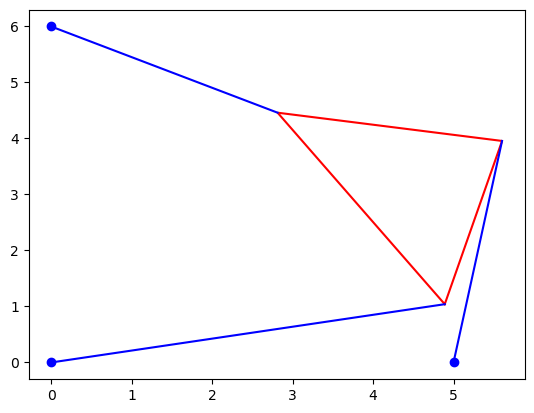

In [52]:
#Plotting for theta1
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta1)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta1,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta1,p_vec[0],p_vec[1],p_vec[2])

x :  4.8991
y :  0.999
p :  [5.0, 4.0, 3.0]


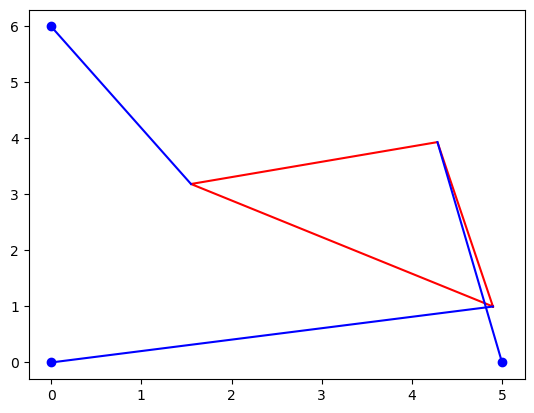

In [53]:
#Plotting for theta2
x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta2)
print('x : ',x)
print('y : ',y)
p_vec=verify_p(theta2,x,y)
print('p : ',p_vec)
Stewart_plot(x,y,theta2,p_vec[0],p_vec[1],p_vec[2])

### Q7)

Calculate the intervals in p2,with the rest of the parameters as in Step4,forwhich
there are 0,2,4, and 6 poses, respectively.`

In [139]:
#Defining an empty list to store all the x values at each theta 
x_root_val=[]
def fpi(theta) :
    '''This function evaluates the user defined function fun at any values of theta '''
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta)
    x_root_val.append(x)
    return f
    

In [140]:
#Denining the function w.r.t theta 
f = lambda theta: fun(L1, L2, L3, gamma, x1, x2, y2, theta)[2]

In [141]:
def find_roots():
    '''This function finds all the values of f where theta ranges from [-pi,pi]  '''
    #Defining and empty list to store all the f/y values 
    roots = []
    ar=np.linspace(-1*np.pi,np.pi,10000)
    for i in range(len(ar)):
        theta_guess =float(ar[i])
        r=fpi(theta_guess)
        roots.append(r)
    return roots

In [142]:
def roots_values_x(roots,p):
    '''This function finds all the values of f where theta ranges from [-pi,pi]'''
#Defining and empty list to store all the f/y values 
    p2=p
    ar=np.linspace((-1)*np.pi,np.pi,10000)
    x_val=[]
    for i in range(len(ar)):
        x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, ar[i])
        x_val.append(ar[i])
    real_roots=[]
    range_1=[]
    range_all_roots=[]
    for i in range(len(ar)-1):
        if (roots[i] >= 0 and roots[i+1] < 0)or(roots[i] < 0 and roots[i+1] >= 0):
            real_roots.append(i)
            
            range_1.append([x_val[i],x_val[i+1]])
    return range_1

In [163]:
for j in range(len(p_x)):
    p2=j
    roots_arr2=[]
    roots_arr4=[]
    roots_arr6 =[]
    x,y,f=fun(L1, L2, L3, gamma, x1, x2, y2, theta2)
    roots=find_roots()
    temp=count_roots(roots)
    print('Count of roots when p is between',[j,j+1],'is :',temp)

Count of roots when p is between [0, 1] is : 0
Count of roots when p is between [1, 2] is : 0
Count of roots when p is between [2, 3] is : 0
Count of roots when p is between [3, 4] is : 0
Count of roots when p is between [4, 5] is : 2
Count of roots when p is between [5, 6] is : 4
Count of roots when p is between [6, 7] is : 4
Count of roots when p is between [7, 8] is : 6
Count of roots when p is between [8, 9] is : 2
Count of roots when p is between [9, 10] is : 2


For p2=7 When there are 6 roots 

In [148]:
import math as m 
x1 = 5
x2 = 0
y2 = 6
L1 = L3 = 3
L2 = m.sqrt(2) * 3
gamma = m.pi * (1/4)
p1 = 5
p3 = 3
ar = np.linspace((-1) * np.pi, np.pi, 10000)
p2=7

In [149]:
roots=find_roots()

In [150]:
roots_arr6.append(roots_values_x(roots,7))

In [151]:
roots_arr6

[[[-0.6733106367279653, -0.6726822553591103],
  [-0.3553496640874143, -0.3547212827185593],
  [0.0373886914468633, 0.03801707281571831],
  [0.45840420857960895, 0.45903258994846396],
  [0.97744721925371, 0.9780756006225655],
  [2.513839666103804, 2.5144680474726586]]]

For p2=4 When there are 4 roots 

In [116]:
p2 = np.linspace(0,10,20)
L1 = 3; L3 = 3
L2 = 3*math.sqrt(2)
gamma = math.pi/4
p1 = 5;p3 = 3
x1 = 5; x2 = 0; y2 = 6
pi = math.pi
theta = np.linspace(-pi, pi, 50)

x_values = []; y_values = []; f_values = []; p2_values = []

for j in p2:
    p2 = j
    p2_values.append(j)
    for i in theta:
        x,y,f_of_theta = fun(L1, L2, L3, gamma, x1, x2, y2, i)
        x_values.append(x)
        y_values.append(y)
        f_values.append(f_of_theta)

In [152]:
import math as m 
x1 = 5
x2 = 0
y2 = 6
L1 = L3 = 3
L2 = m.sqrt(2) * 3
gamma = m.pi * (1/4)
p1 = 5
p3 = 3
ar = np.linspace((-1) * np.pi, np.pi, 10000)
p2=5

roots=find_roots()
roots_arr4.append(roots_values_x(roots,4))
roots_arr4

[[[-0.7210676207609334, -0.7204392393920784],
  [-0.33147117207093, -0.33084279070207545],
  [1.1433399006313891, 1.1439682820002437],
  [2.115445878249833, 2.1160742596186877]]]

In [118]:
root_df = pd.DataFrame(list(zip(x_values,y_values,theta,f_values,p2_values)), columns = ['x','y','theta','f_of_theta','p2_values']) # creating table to display values
root_df

,x,y,theta,f_of_theta,p2_values
0,5.5625,4.0347,-3.141593,460762.0000,0.000000
1,5.3521,4.4110,-3.013364,501207.4494,0.526316
2,5.1107,4.7642,-2.885136,531956.4764,1.052632
3,4.8418,5.0902,-2.756908,551134.9135,1.578947
4,4.5497,5.3858,-2.628680,557590.9475,2.105263
5,4.2389,5.6484,-2.500451,551004.2918,2.631579
6,3.9149,5.8764,-2.372223,531915.0191,3.157895
7,3.5832,6.0687,-2.243995,501668.6427,3.684211
8,3.2500,6.2256,-2.115766,462283.9600,4.210526
9,2.9218,6.3482,-1.987538,416259.2504,4.736842


For p2=2 When there are 2 roots 

In [153]:
import math as m 
x1 = 5
x2 = 0
y2 = 6
L1 = L3 = 3
L2 = m.sqrt(2) * 3
gamma = m.pi * (1/4)
p1 = 5
p3 = 3
ar = np.linspace((-1) * np.pi, np.pi, 10000)
p2=4

roots=find_roots()
roots_arr2.append(roots_values_x(roots,4))
roots_arr2

[[[1.331225929918988, 1.3318543112878425],
  [1.7773767018059266, 1.778005083174782]]]